## Problemas cap 4

1. Uma bola de futebol é chutada com velocidade de 100 km/h, a fazer um ângulo de 10º com o campo (horizontal).


d) Desenvolva um programa que obtenha a lei do movimento e a lei da velocidade em função do tempo, usando o método de Euler. Tem confiança que o seu programa está correto?


 exato sem resist.: tm, ym,tsolo, xsolo = 0.4922000500763331 1.1870783575462098 0.9844001001526662 26.92902363045388


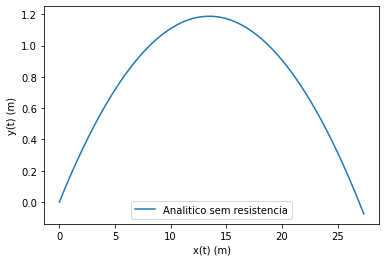

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 21 17:00:09 2021

@author: cdazevedo
"""

#Solução exacta

import numpy as np
import matplotlib.pyplot as plt

dt=0.00001
tf=1.00
n=np.int(tf/dt+0.1)

t=np.linspace(0,tf,n)


g=9.80      # m/s**2
vt=100*1000/3600  # m/s
vel0=100*1000/3600  # m/s
theta=10*np.pi/180  # rad
v0x=vel0*np.cos(theta)
v0y=vel0*np.sin(theta)
x0=0
y0=0


tsolo=2*v0y/g
xsolo=2*v0x*v0y/g
ym=y0+0.5*v0y**2/g
tm=v0y/g


print(' exato sem resist.: tm, ym,tsolo, xsolo =',tm,ym,tsolo,xsolo)


xs=x0+v0x*t
ys=y0+v0y*t-0.5*g*t**2

fig, ax1 = plt.subplots(1)
ax1.set_xlabel( 'x(t) (m)' )
ax1.set_ylabel( 'y(t) (m)' )
ax1.plot(xs,ys,'-',label='Analitico sem resistencia')
plt.legend()
plt.show()

**Solução pelo Método de Euler**


C:\Users\joseg\AppData\Local\Temp/ipykernel_2504/3659057330.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n=np.int(tf/dt+0.1)


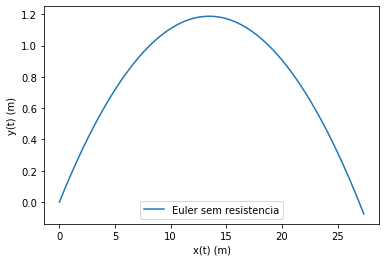

1.1871


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 21 17:00:09 2021

@author: adapted from cdazevedo
"""

#a)

import numpy as np
import matplotlib.pyplot as plt

dt=0.00001
tf=1.00
n=np.int(tf/dt+0.1)

t=np.linspace(0,tf,n)


g=9.80      # m/s**2
vt=100*1000/3600  # m/s
vel0=100*1000/3600  # m/s
theta=10*np.pi/180  # rad
v0x=vel0*np.cos(theta)
v0y=vel0*np.sin(theta)
x0=0
y0=0


vy=np.empty(n)
y=np.empty(n)
vx=np.empty(n)
x=np.empty(n)
ax=0
ay=-g
vx[0]=v0x
vy[0]=v0y
x[0]=x0
y[0]=y0

for i in range(0,n-1):
    vx[i+1]=vx[i]
    vy[i+1]=vy[i]+ay*dt
    x[i+1]=x[i]+vx[i]*dt
    y[i+1]=y[i]+vy[i]*dt

fig, ax1 = plt.subplots(1)
ax1.set_xlabel( 'x(t) (m)' )
ax1.set_ylabel( 'y(t) (m)' )
ax1.plot(x,y,'-',label='Euler sem resistencia')

plt.legend()
plt.show()

t_max_sem_resistencia = np.round(np.unique(t[y==y.max()])[0],4)
y_max_sem_resistencia = np.round(y.max(),4)
x_pos = x[y>=0]
y_pos = y[y>=0]
x_max_sem_resistencia = np.round(x_pos[x_pos == x_pos.max()],4)[0]
t_max_alcance_sem_resistencia = t[y>=0][x_pos == x_pos.max()][0]


**Como podemos verificar o resultado com o método de Euler e o valor analítico esperado  dão resultados idênticos**

e) Considere agora a resistência do ar. A força de resistência do ar ao movimento da bola é:
	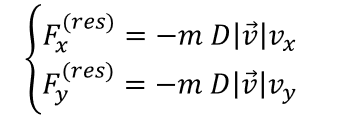
em que 𝐷=𝑔/𝑣_𝑇^2, e a velocidade terminal é 𝑣_𝑇=100  km/h. Atualize o seu programa  de modo a considerar a força de resistência do ar. Faça o gráfico da altura em função da distância percorrida na horizontal.


C:\Users\joseg\AppData\Local\Temp/ipykernel_14940/431572580.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n=np.int(tf/dt+0.1)


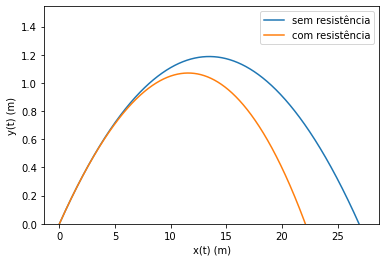

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 21 17:00:09 2021

@author: adapted from cdazevedo 
"""

# e) (Considerando resistencia do ar)
import numpy as np
import matplotlib.pyplot as plt

dt=0.00001
tf=1.00
n=np.int(tf/dt+0.1)

t=np.linspace(0,tf,n)


g=9.80      # m/s**2
vt=100*1000/3600  # m/s
vel0=100*1000/3600  # m/s
theta=10*np.pi/180  # rad
v0x=vel0*np.cos(theta)
v0y=vel0*np.sin(theta)
x0=0
y0=0


vy=np.empty(n)
y=np.empty(n)
vx=np.empty(n)
x=np.empty(n)
ax=np.empty(n)
ay=np.empty(n)
vx[0]=v0x
vy[0]=v0y
x[0]=x0
y[0]=y0

D=g/vt**2

for i in range(0,n-1):
    vv=np.sqrt(vx[i]**2+vy[i]**2)
    ax[i]=-D*vv*vx[i]
    ay[i]=-D*vv*vy[i]-g
    vx[i+1]=vx[i]+ax[i]*dt
    vy[i+1]=vy[i]+ay[i]*dt
    x[i+1]=x[i]+vx[i]*dt
    y[i+1]=y[i]+vy[i]*dt
    

xs=x0+v0x*t
ys=y0+v0y*t-0.5*g*t**2

fig, ax1 = plt.subplots(1)
ax1.set_xlabel( 'x(t) (m)' )
ax1.set_ylabel( 'y(t) (m)' )
ax1.plot(xs,ys,label='sem resistência')
ax1.plot(x,y,'-',label='com resistência')

ax1.set_ylim(0, 1.3*ys.max())
plt.legend()
plt.show()


f) Nas condições da alínea e), determine qual a altura máxima atingida pela bola e em que instante? Tem confiança no seu resultado?


In [6]:
#Mofidicando o valor de dt na célula anterior  verifica-se que o resultado 
# experimental aproxima-se do teórico à medida que dt diminui
t_max_sem_resistencia_teorico = v0y/g
y_max_analitico_sem_resistencia =y0+v0y*t_max_sem_resistencia-0.5*g*t_max_sem_resistencia**2
t_max_com_resistencia = np.round(np.unique(t[y==y.max()])[0],4)
y_max_com_resistencia = np.round(y.max(),4)

print("EULER: A altura máxima atingida pelo bola tendo em consideração a resistência do ar é: {} m ao fim de {}s".format(y_max_com_resistencia,t_max_com_resistencia))
print("EULER: A altura máxima atingida pelo bola sem resistência do ar é: {} m ao fim de {} s".format(y_max_sem_resistencia,t_max_sem_resistencia))



EULER: A altura máxima atingida pelo bola tendo em consideração a resistência do ar é: 1.0701 m ao fim de 0.4558s
EULER: A altura máxima atingida pelo bola sem resistência do ar é: 1.1871 m ao fim de 0.4922 s


g) Nas condições da alínea e), qual o alcance (distância entre a posição onde foi chutada e o ponto onde alcançou no campo) da trajetória da bola e quanto tempo demorou? Tem confiança no seu resultado?


In [7]:
x_pos = x[y>=0]
y_pos = y[y>=0]
x_max_com_resistencia = np.round(x_pos[x_pos == x_pos.max()],4)[0]
t_max_alcance_com_resistencia = t[y>=0][x_pos == x_pos.max()][0]

In [8]:
print("EULER: O alcance máxima atingido pelo bola tendo em consideração a resistência do ar é: {} m ao fim de {}s".format(x_max_com_resistencia,t_max_alcance_com_resistencia))
print("EULER: O alcance máxima atingido pelo bola tendo em sem a resistência do ar é: {} m ao fim de {}s".format(x_max_sem_resistencia,t_max_sem_resistencia))



EULER: O alcance máxima atingido pelo bola tendo em consideração a resistência do ar é: 22.1038 m ao fim de 0.9336193361933619s
EULER: O alcance máxima atingido pelo bola tendo em sem a resistência do ar é: 26.9293 m ao fim de 0.4922s
